In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
uni_ranks = pd.read_csv('university_ranking.csv')

In [4]:
uni_ranks.set_index("Rank")

,Name,Region,Location,City,Overall Score,International Students Ratio,International Faculty Ratio,Faculty Student Ratio,Academic Reputation,Citations Per Faculty,Employer Reputation
Rank,,,,,,,,,,,
1,Massachusetts Institute of Technology (MIT),North America,United States,Cambridge,100.0,91.4,100,100.0,100.0,100.0,100.0
2,University of Oxford,Europe,United Kingdom,Oxford,99.5,98.5,99.5,100.0,100.0,96.0,100.0
3,Stanford University,North America,United States,Stanford,98.7,67.0,99.8,100.0,100.0,99.9,100.0
4,University of Cambridge,Europe,United Kingdom,Cambridge,98.7,97.7,100,100.0,100.0,92.1,100.0
5,Harvard University,North America,United States,Cambridge,98.0,70.1,84.2,99.1,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
196,Technische Universit�t Dresden,Europe,Germany,Dresden,44.8,37.1,25.2,86.6,38.0,19.5,51.0
197,University of Otago,Oceania,New Zealand,Dunedin,44.8,47.4,100,16.0,50.6,49.5,39.2
198,"The University of Newcastle, Australia (UON)",Oceania,Australia,Callaghan,44.6,30.5,100,32.9,30.8,80.6,28.6


In [5]:
uni_ranks.shape

(200, 12)

In [6]:
uni_ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rank                          200 non-null    int64  
 1   Name                          200 non-null    object 
 2   Region                        200 non-null    object 
 3   Location                      200 non-null    object 
 4   City                          198 non-null    object 
 5   Overall Score                 200 non-null    float64
 6   International Students Ratio  200 non-null    float64
 7   International Faculty Ratio   200 non-null    object 
 8   Faculty Student Ratio         200 non-null    float64
 9   Academic Reputation           200 non-null    float64
 10  Citations Per Faculty         200 non-null    float64
 11  Employer Reputation           200 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 18.9+ KB


In [152]:
uni_ranks.describe()

,Rank,Overall Score,International Students Ratio,Faculty Student Ratio,Academic Reputation,Citations Per Faculty,Employer Reputation
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,100.500000,63.982500,58.617000,59.43050,66.112000,64.956500,63.727000
std,57.879185,15.435007,31.458597,31.04294,23.187886,25.351835,26.308998
min,1.000000,44.200000,1.600000,3.50000,13.700000,1.300000,10.000000
25%,50.750000,50.500000,32.075000,32.82500,47.075000,49.025000,44.500000
50%,100.500000,59.750000,61.750000,62.60000,65.800000,64.500000,63.700000
75%,150.250000,75.650000,88.650000,87.00000,87.750000,87.950000,89.300000
max,200.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000


# Numerical Analysis and Visualization

## Analyze and Visualize the number of universities per location

In [7]:
location_amount = []
location_count = uni_ranks.groupby("Location").Location.unique()
for loc in location_count:
    location_amount.extend(loc)
print(location_amount)

['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China (Mainland)', 'Denmark', 'Finland', 'France', 'Germany', 'Hong Kong SAR', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'United Arab Emirates', 'United Kingdom', 'United States']


In [8]:
university_amount = []
university_count = uni_ranks.groupby("Location").Name.count()
print(university_count)
for count in university_count:
    university_amount.append(count)

Location
Argentina                1
Australia               12
Austria                  2
Belgium                  3
Brazil                   1
Canada                   8
Chile                    2
China (Mainland)         7
Denmark                  3
Finland                  2
France                   5
Germany                 11
Hong Kong SAR            5
India                    3
Ireland                  2
Israel                   1
Italy                    3
Japan                    8
Kazakhstan               1
Malaysia                 5
Mexico                   2
Netherlands              9
New Zealand              2
Norway                   2
Russia                   1
Saudi Arabia             2
Singapore                2
South Korea              7
Spain                    1
Sweden                   6
Switzerland              7
Taiwan                   2
United Arab Emirates     1
United Kingdom          26
United States           45
Name: Name, dtype: int64


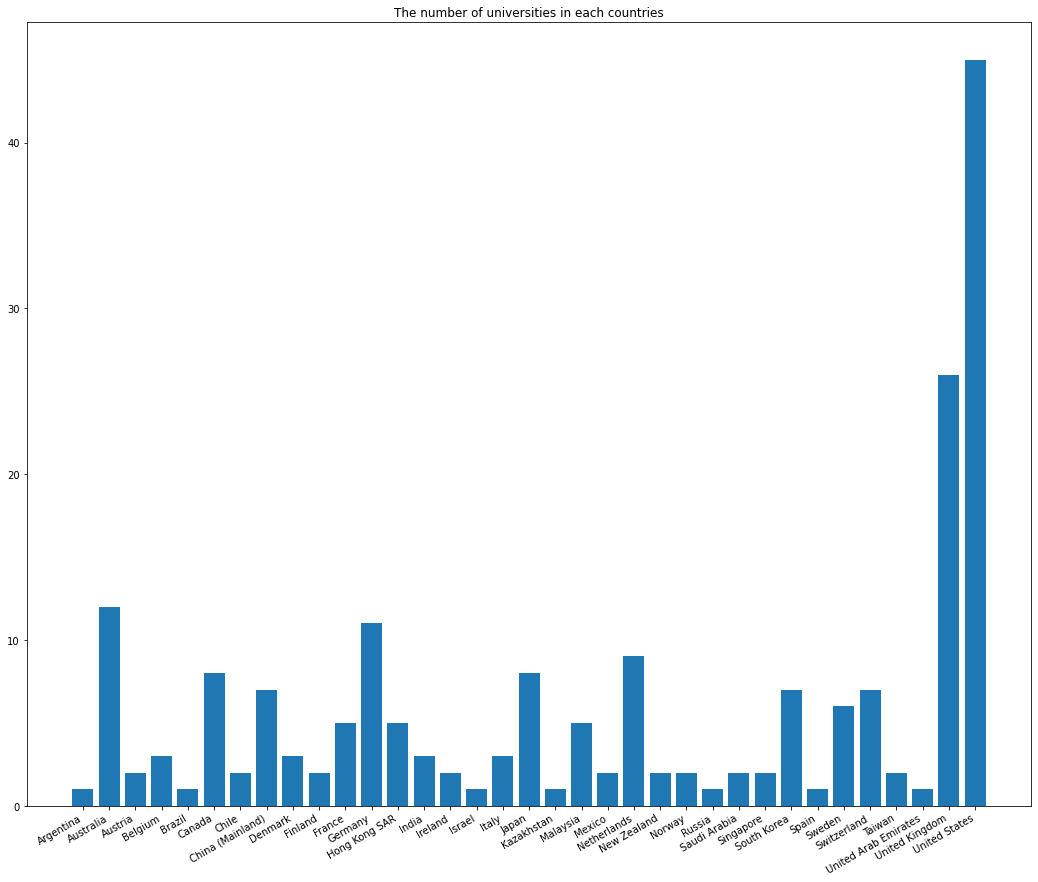

In [6]:
countries_axis = location_amount
university_amount_axis = university_amount
plt.title('The number of universities in each countries')
plt.bar(countries_axis, university_amount_axis, align='center')
plt.gcf().autofmt_xdate()
fig = plt.gcf()
fig.set_size_inches(18, 16)
plt.show()

## Analyze and Visualize the percentage of universitites per region

In [42]:
percent = []
uni_count = []
uni_per_region = uni_ranks.groupby("Region").Name.count()
for count in uni_per_region:
    uni_count.append(count)
print(uni_per_region)
for i in uni_count:
    percent.append(i/sum(uni_count)*100)
print(percent)

Region
Asia             44
Europe           83
Latin America     6
North America    53
Oceania          14
Name: Name, dtype: int64
[22.0, 41.5, 3.0, 26.5, 7.000000000000001]


In [24]:
region = []
for count in uni_ranks.groupby("Region").Region.unique():
    region.extend(count)
print(region)  

['Asia', 'Europe', 'Latin America', 'North America', 'Oceania']


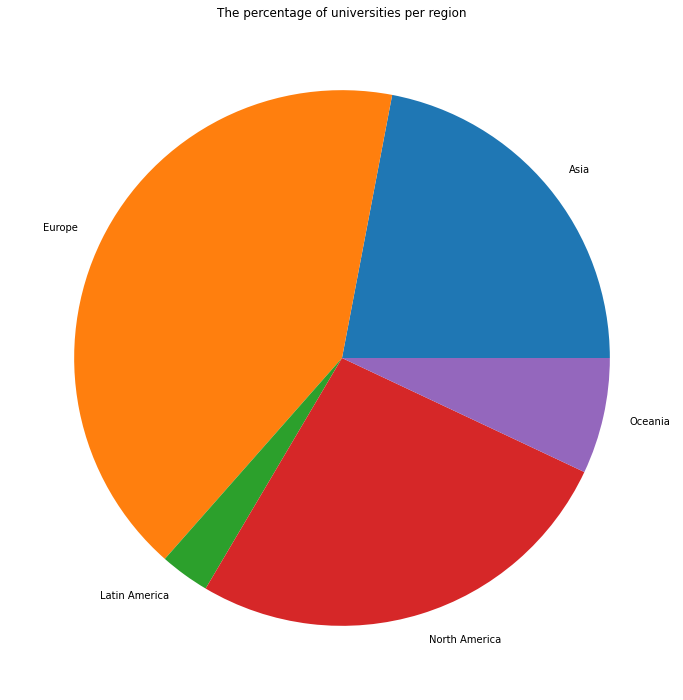

In [40]:
plt.pie(percent, labels=region)
plt.title("The percentage of universities per region")
fig = plt.gcf()
fig.set_size_inches(12, 13)
plt.show()